In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv("Cleaned_Sample_removed_cols.csv")
df.head()

,FlightDate,Airline,OriginAirport,DestAirport,Cancelled,Diverted,SchdDepTime,DepTime,DepDelayMinutes,DepDelay,...,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,SchdArrTime,ArrDelay,ArrivalDelayGroups,DistanceGroup,ArrDel15
0,24-03-2018,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855,0,-5,...,-1,6,1901,1920,7,1935,-8,-1,1,0
1,23-04-2018,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111,16,16,...,1,22,2133,2253,23,2249,27,1,2,1
2,16-02-2018,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728,38,38,...,2,16,1744,1859,4,1820,43,2,3,1
3,07-12-2018,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851,6,6,...,0,9,1900,2207,7,2215,-1,-1,4,0
4,03-06-2018,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201,1,1,...,0,7,1208,1637,2,1655,-16,-2,6,0


In [102]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'Cancelled',
       'Diverted', 'SchdDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'SchdElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'SchdArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'DistanceGroup', 'ArrDel15'],
      dtype='object')

In [103]:
columns_to_drop = ["ArrTime", "DepTime", "WheelsOff", "WheelsOn",
                   "ActualElapsedTime", "SchdArrTime","Quarter","DistanceGroup","Cancelled","Diverted","OriginCityName","OriginStateName","DestCityName","DestState","DestStateName","ArrDelay","DepartureDelayGroups"]

In [104]:
df = df.drop(columns=columns_to_drop)

In [105]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'DepDelayMinutes', 'DepDelay', 'ArrDelayMinutes', 'AirTime',
       'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'DepDel15', 'TaxiOut', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDel15'],
      dtype='object')

In [106]:
columns_to_drop=["Airline","OriginAirport","DestAirport","DepDelay","ArrivalDelayGroups","ArrDel15"]
df = df.drop(columns=columns_to_drop)

In [107]:
df.columns

Index(['FlightDate', 'SchdDepTime', 'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'DepDel15', 'TaxiOut', 'TaxiIn'],
      dtype='object')

In [108]:
columns_to_drop=["DepDel15"]
df = df.drop(columns=columns_to_drop)

In [85]:
df.columns

Index(['FlightDate', 'SchdDepTime', 'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'TaxiOut', 'TaxiIn'],
      dtype='object')

In [109]:
import pandas as pd
import holidays

# Ensure SchdDepTime is in a 4-digit format
df['SchdDepTime'] = df['SchdDepTime'].astype(str).str.zfill(4)

# Extract hour from SchdDepTime
df['SchdDepHour'] = df['SchdDepTime'].str[:2].astype(int)

# Create time-of-day categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['SchdDepTimeOfDay'] = pd.cut(df['SchdDepHour'], bins=bins, labels=labels, right=False)

# Check for holidays
us_holidays = holidays.US()
df['IsHoliday'] = df['FlightDate'].apply(lambda x: x in us_holidays)

In [110]:
df.columns

Index(['FlightDate', 'SchdDepTime', 'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'TaxiOut', 'TaxiIn', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday'],
      dtype='object')

In [111]:
df.head(30)

,FlightDate,SchdDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,Operating_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,SchdDepHour,SchdDepTimeOfDay,IsHoliday
0,24-03-2018,1900,0,0,19,35,102,2018,3,24,6,HA,12982,12173,6,7,19,Evening,False
1,23-04-2018,2055,16,27,80,114,496,2018,4,23,1,9E,10721,14122,22,23,20,Evening,False
2,16-02-2018,1650,38,43,75,90,571,2018,2,16,5,WN,12191,11481,16,4,16,Afternoon,False
3,07-12-2018,1845,6,0,127,150,990,2018,12,7,5,WN,13232,13204,9,7,18,Evening,False
4,03-06-2018,1200,1,0,149,175,1294,2018,6,3,7,WN,12889,12992,7,2,12,Afternoon,False
5,07-08-2018,1055,0,0,64,85,377,2018,8,7,2,WN,10821,13296,8,5,10,Morning,False
6,09-02-2018,1025,0,0,116,150,912,2018,2,9,5,YV,12266,11057,25,9,10,Morning,False
7,14-11-2018,0845,0,0,342,376,2434,2018,11,14,3,UA,11618,14057,36,4,8,Morning,False
8,02-09-2018,1012,0,10,135,162,1020,2018,9,2,7,AA,14107,11884,40,7,10,Morning,False
9,14-12-2018,1558,0,0,53,98,235,2018,12,14,5,DL,11433,13930,17,14,15,Afternoon,False


In [112]:
print(df.isnull().sum())

FlightDate           0
SchdDepTime          0
DepDelayMinutes      0
ArrDelayMinutes      0
AirTime              0
SchdElapsedTime      0
Distance             0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Operating_Airline    0
OriginAirportID      0
DestAirportID        0
TaxiOut              0
TaxiIn               0
SchdDepHour          0
SchdDepTimeOfDay     0
IsHoliday            0
dtype: int64


In [113]:
df.columns

Index(['FlightDate', 'SchdDepTime', 'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'TaxiOut', 'TaxiIn', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday'],
      dtype='object')

In [114]:
df=df.drop(columns="FlightDate")

In [115]:
df.head()

,SchdDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,Operating_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,SchdDepHour,SchdDepTimeOfDay,IsHoliday
0,1900,0,0,19,35,102,2018,3,24,6,HA,12982,12173,6,7,19,Evening,False
1,2055,16,27,80,114,496,2018,4,23,1,9E,10721,14122,22,23,20,Evening,False
2,1650,38,43,75,90,571,2018,2,16,5,WN,12191,11481,16,4,16,Afternoon,False
3,1845,6,0,127,150,990,2018,12,7,5,WN,13232,13204,9,7,18,Evening,False
4,1200,1,0,149,175,1294,2018,6,3,7,WN,12889,12992,7,2,12,Afternoon,False


In [116]:
df.columns

Index(['SchdDepTime', 'DepDelayMinutes', 'ArrDelayMinutes', 'AirTime',
       'SchdElapsedTime', 'Distance', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'DestAirportID',
       'TaxiOut', 'TaxiIn', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday'],
      dtype='object')

In [117]:
print(df.dtypes)

SchdDepTime            object
DepDelayMinutes         int64
ArrDelayMinutes         int64
AirTime                 int64
SchdElapsedTime         int64
Distance                int64
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
Operating_Airline      object
OriginAirportID         int64
DestAirportID           int64
TaxiOut                 int64
TaxiIn                  int64
SchdDepHour             int64
SchdDepTimeOfDay     category
IsHoliday                bool
dtype: object


In [118]:
df['SchdDepHour'] = df['SchdDepTime'].str[:2].astype(int)   # First two characters = Hour
df['SchdDepMinute'] = df['SchdDepTime'].str[2:].astype(int) # Last two characters = Minutes

In [119]:
df.head(20)

,SchdDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,Operating_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,SchdDepHour,SchdDepTimeOfDay,IsHoliday,SchdDepMinute
0,1900,0,0,19,35,102,2018,3,24,6,HA,12982,12173,6,7,19,Evening,False,0
1,2055,16,27,80,114,496,2018,4,23,1,9E,10721,14122,22,23,20,Evening,False,55
2,1650,38,43,75,90,571,2018,2,16,5,WN,12191,11481,16,4,16,Afternoon,False,50
3,1845,6,0,127,150,990,2018,12,7,5,WN,13232,13204,9,7,18,Evening,False,45
4,1200,1,0,149,175,1294,2018,6,3,7,WN,12889,12992,7,2,12,Afternoon,False,0
5,1055,0,0,64,85,377,2018,8,7,2,WN,10821,13296,8,5,10,Morning,False,55
6,1025,0,0,116,150,912,2018,2,9,5,YV,12266,11057,25,9,10,Morning,False,25
7,0845,0,0,342,376,2434,2018,11,14,3,UA,11618,14057,36,4,8,Morning,False,45
8,1012,0,10,135,162,1020,2018,9,2,7,AA,14107,11884,40,7,10,Morning,False,12
9,1558,0,0,53,98,235,2018,12,14,5,DL,11433,13930,17,14,15,Afternoon,False,58


In [120]:
print(df.isnull().sum())

SchdDepTime          0
DepDelayMinutes      0
ArrDelayMinutes      0
AirTime              0
SchdElapsedTime      0
Distance             0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Operating_Airline    0
OriginAirportID      0
DestAirportID        0
TaxiOut              0
TaxiIn               0
SchdDepHour          0
SchdDepTimeOfDay     0
IsHoliday            0
SchdDepMinute        0
dtype: int64


In [121]:
df.drop(columns=['SchdDepTime'], inplace=True)

In [122]:
df.columns

Index(['DepDelayMinutes', 'ArrDelayMinutes', 'AirTime', 'SchdElapsedTime',
       'Distance', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'Operating_Airline', 'OriginAirportID', 'DestAirportID', 'TaxiOut',
       'TaxiIn', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday',
       'SchdDepMinute'],
      dtype='object')

In [123]:
print(df.dtypes)

DepDelayMinutes         int64
ArrDelayMinutes         int64
AirTime                 int64
SchdElapsedTime         int64
Distance                int64
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
Operating_Airline      object
OriginAirportID         int64
DestAirportID           int64
TaxiOut                 int64
TaxiIn                  int64
SchdDepHour             int64
SchdDepTimeOfDay     category
IsHoliday                bool
SchdDepMinute           int64
dtype: object


In [124]:
df.shape

(48417, 18)

In [125]:
df['IsHoliday'] = df['IsHoliday'].astype(int)

# One-hot encode 'SchdDepTimeOfDay' and 'Operating_Airline'
df = pd.get_dummies(df, columns=['SchdDepTimeOfDay', 'Operating_Airline'], drop_first=True)

In [126]:
print(df.dtypes)

DepDelayMinutes               int64
ArrDelayMinutes               int64
AirTime                       int64
SchdElapsedTime               int64
Distance                      int64
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
OriginAirportID               int64
DestAirportID                 int64
TaxiOut                       int64
TaxiIn                        int64
SchdDepHour                   int64
IsHoliday                     int64
SchdDepMinute                 int64
SchdDepTimeOfDay_Morning       bool
SchdDepTimeOfDay_Afternoon     bool
SchdDepTimeOfDay_Evening       bool
Operating_Airline_9K           bool
Operating_Airline_AA           bool
Operating_Airline_AS           bool
Operating_Airline_AX           bool
Operating_Airline_B6           bool
Operating_Airline_C5           bool
Operating_Airline_CP           bool
Operating_Airline_DL           bool
Operating_Airline_EM        

In [127]:
df.head(10)

,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,...,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_VX,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,0,0,19,35,102,2018,3,24,6,12982,...,False,False,False,False,False,False,False,False,False,False
1,16,27,80,114,496,2018,4,23,1,10721,...,False,False,False,False,False,False,False,False,False,False
2,38,43,75,90,571,2018,2,16,5,12191,...,False,False,False,False,False,False,True,False,False,False
3,6,0,127,150,990,2018,12,7,5,13232,...,False,False,False,False,False,False,True,False,False,False
4,1,0,149,175,1294,2018,6,3,7,12889,...,False,False,False,False,False,False,True,False,False,False
5,0,0,64,85,377,2018,8,7,2,10821,...,False,False,False,False,False,False,True,False,False,False
6,0,0,116,150,912,2018,2,9,5,12266,...,False,False,False,False,False,False,False,True,False,False
7,0,0,342,376,2434,2018,11,14,3,11618,...,False,False,False,False,True,False,False,False,False,False
8,0,10,135,162,1020,2018,9,2,7,14107,...,False,False,False,False,False,False,False,False,False,False
9,0,0,53,98,235,2018,12,14,5,11433,...,False,False,False,False,False,False,False,False,False,False


In [128]:
df = df.astype(int)

In [129]:
df.head(10)

,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,...,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_VX,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,0,0,19,35,102,2018,3,24,6,12982,...,0,0,0,0,0,0,0,0,0,0
1,16,27,80,114,496,2018,4,23,1,10721,...,0,0,0,0,0,0,0,0,0,0
2,38,43,75,90,571,2018,2,16,5,12191,...,0,0,0,0,0,0,1,0,0,0
3,6,0,127,150,990,2018,12,7,5,13232,...,0,0,0,0,0,0,1,0,0,0
4,1,0,149,175,1294,2018,6,3,7,12889,...,0,0,0,0,0,0,1,0,0,0
5,0,0,64,85,377,2018,8,7,2,10821,...,0,0,0,0,0,0,1,0,0,0
6,0,0,116,150,912,2018,2,9,5,12266,...,0,0,0,0,0,0,0,1,0,0
7,0,0,342,376,2434,2018,11,14,3,11618,...,0,0,0,0,1,0,0,0,0,0
8,0,10,135,162,1020,2018,9,2,7,14107,...,0,0,0,0,0,0,0,0,0,0
9,0,0,53,98,235,2018,12,14,5,11433,...,0,0,0,0,0,0,0,0,0,0


In [131]:
print(df.dtypes)

DepDelayMinutes               int64
ArrDelayMinutes               int64
AirTime                       int64
SchdElapsedTime               int64
Distance                      int64
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
OriginAirportID               int64
DestAirportID                 int64
TaxiOut                       int64
TaxiIn                        int64
SchdDepHour                   int64
IsHoliday                     int64
SchdDepMinute                 int64
SchdDepTimeOfDay_Morning      int64
SchdDepTimeOfDay_Afternoon    int64
SchdDepTimeOfDay_Evening      int64
Operating_Airline_9K          int64
Operating_Airline_AA          int64
Operating_Airline_AS          int64
Operating_Airline_AX          int64
Operating_Airline_B6          int64
Operating_Airline_C5          int64
Operating_Airline_CP          int64
Operating_Airline_DL          int64
Operating_Airline_EM        

Correlation with ArrDelayMinutes:
ArrDelayMinutes               1.000000
DepDelayMinutes               0.977977
TaxiOut                       0.163075
TaxiIn                        0.089793
SchdDepHour                   0.077811
SchdDepTimeOfDay_Evening      0.052914
Operating_Airline_C5          0.040266
Operating_Airline_B6          0.035426
SchdDepTimeOfDay_Afternoon    0.028276
Operating_Airline_F9          0.023116
Operating_Airline_G4          0.016415
Operating_Airline_NK          0.015796
SchdDepMinute                 0.015300
Operating_Airline_KS          0.014949
Operating_Airline_AA          0.013957
Operating_Airline_YV          0.011844
Operating_Airline_EV          0.010594
AirTime                       0.007753
Operating_Airline_G7          0.007287
IsHoliday                     0.007113
Operating_Airline_AX          0.006954
Operating_Airline_ZW          0.006578
Operating_Airline_UA          0.004639
DayOfWeek                     0.003792
Operating_Airline_OO          

<ipython-input-132-96bad8e1adda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


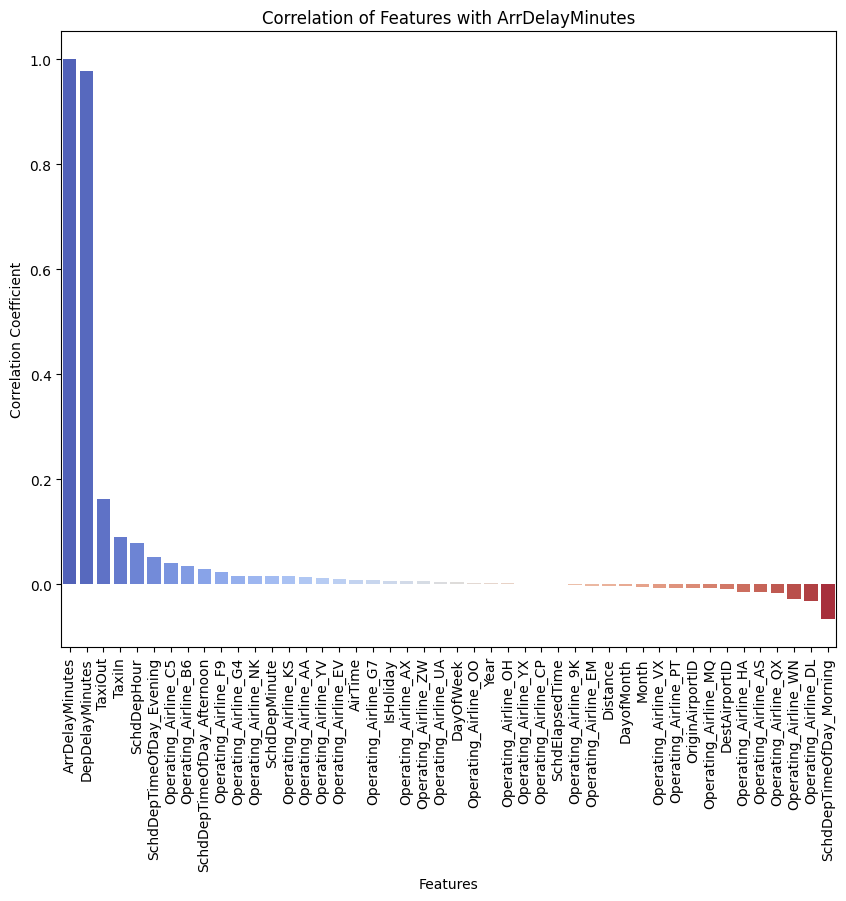

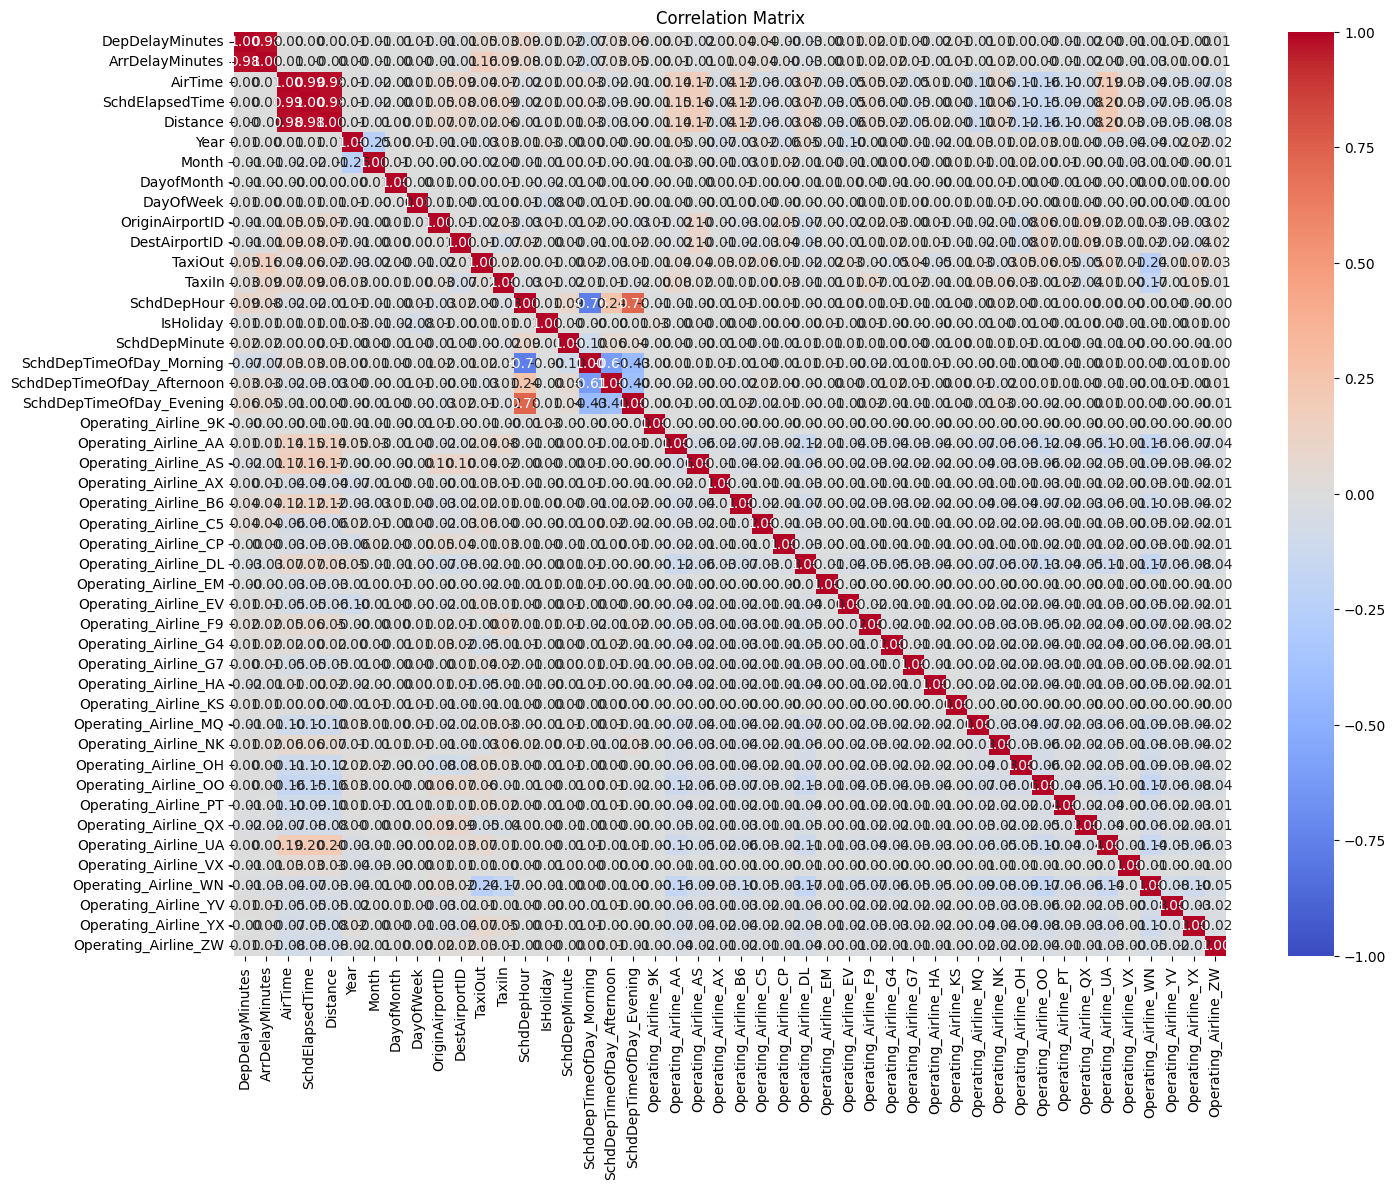

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named `df`

# Step 1: Compute the correlation matrix
corr_matrix = df.corr()

# Step 2: Extract correlations with the target variable (ArrDelayMinutes)
target_corr = corr_matrix['ArrDelayMinutes'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation with ArrDelayMinutes:")
print(target_corr)

# Step 3: Visualize the correlations using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation of Features with ArrDelayMinutes")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# Step 4: Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [133]:
df.head()

,DepDelayMinutes,ArrDelayMinutes,AirTime,SchdElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,...,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_VX,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,0,0,19,35,102,2018,3,24,6,12982,...,0,0,0,0,0,0,0,0,0,0
1,16,27,80,114,496,2018,4,23,1,10721,...,0,0,0,0,0,0,0,0,0,0
2,38,43,75,90,571,2018,2,16,5,12191,...,0,0,0,0,0,0,1,0,0,0
3,6,0,127,150,990,2018,12,7,5,13232,...,0,0,0,0,0,0,1,0,0,0
4,1,0,149,175,1294,2018,6,3,7,12889,...,0,0,0,0,0,0,1,0,0,0


In [134]:
# List of selected features
selected_features = [
    'DepDelayMinutes',  # Strongest predictor
    'TaxiOut',          # Moderate impact
    'TaxiIn',           # Moderate impact
    'SchdDepHour',      # Time of day
    'SchdDepTimeOfDay_Evening',  # Evening flights
    'IsHoliday'         # Holiday indicator
]

# Filter the dataframe to include only selected features
X = df[selected_features]
y = df['ArrDelayMinutes']  # Target variable

# Display the filtered dataframe
print(X.head())

   DepDelayMinutes  TaxiOut  TaxiIn  SchdDepHour  SchdDepTimeOfDay_Evening  \
0                0        6       7           19                         1   
1               16       22      23           20                         1   
2               38       16       4           16                         0   
3                6        9       7           18                         1   
4                1        7       2           12                         0   

   IsHoliday  
0          0  
1          0  
2          0  
3          0  
4          0  


In [135]:
print(X.shape,y.shape)

(48417, 6) (48417,)


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [138]:
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [140]:

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 3.356255706333479
Mean Squared Error (MSE): 50.128527668282054
Root Mean Squared Error (RMSE): 7.080150257465024
R-squared (R²): 0.9756629059684557


In [172]:

user_input = {
    "DepDelayMinutes": 0,
    "TaxiOut": 0,
    "TaxiIn": 0,
    "SchdDepHour": 6,  # 7:00 PM
    "SchdDepTimeOfDay_Evening": 0,  # Evening flight
    "IsHoliday": 0
}

In [173]:
# Convert user input to DataFrame
input_df = pd.DataFrame([user_input])

# Ensure column order matches training data
input_df = input_df[selected_features]

In [174]:
predicted_delay = rf_model.predict(input_df)
print(f"Predicted Arrival Delay: {predicted_delay[0]:.2f} minutes")

Predicted Arrival Delay: 12.21 minutes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [175]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}")


Gradient Boosting Regressor - MAE: 3.132253935016356, MSE: 41.41018491246797, RMSE: 6.435074584841109, R²: 0.9798956081306167


In [176]:
import xgboost as xgb

# Initialize the model
xgb_reg = xgb.XGBRegressor()

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost Regressor - MAE: 3.511396884918213, MSE: 142.49278259277344, RMSE: 11.93703407856296, R²: 0.9308205842971802


In [178]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn = KNeighborsRegressor()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regressor - MAE: {mae_knn}, MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}")


K-Nearest Neighbors Regressor - MAE: 3.587360594795539, MSE: 63.22420487401901, RMSE: 7.951364969237609, R²: 0.9693050346646787


In [179]:
from sklearn.linear_model import ElasticNet

# Initialize the model
elastic_net = ElasticNet()

# Train the model
elastic_net.fit(X_train, y_train)

# Make predictions
y_pred_en = elastic_net.predict(X_test)

# Evaluate the model
mae_en = mean_absolute_error(y_test, y_pred_en)
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"ElasticNet - MAE: {mae_en}, MSE: {mse_en}, RMSE: {rmse_en}, R²: {r2_en}")


ElasticNet - MAE: 7.360664052490048, MSE: 294.2719732222142, RMSE: 17.15435726636863, R²: 0.8571327542163473
